In [44]:
import pandas as pd
import numpy as np

reponse = pd.read_csv('C:/Users/DELL/Documents/MBD/S3/Deep Learning MBD 2023/Project/reponses.csv', encoding='utf-8')

reponse


,id,reponse,score
0,14,ست,1.0
1,14,ستة,1.0
2,14,NaN,NaN
3,14,ست سور,1.0
4,14,ستة سور,1.0
...,...,...,...
700,23,قوم عاد كانوا يعبدون الله والأصنام معًا، وكانت...,0.0
701,23,NaN,0.0
702,23,NaN,0.0
703,23,عبادة قوم عاد للأصنام كانت جزءًا من عقائدهم ال...,0.0


In [45]:
type = reponse.dtypes
type

id           int64
reponse     object
score      float64
dtype: object

In [46]:
# Convert 'reponse' column to strings
reponse = reponse.dropna()
reponse['reponse'] = reponse['reponse'].astype(str)
reponse

C:\Users\DELL\AppData\Local\Temp\ipykernel_14168\1418262839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reponse['reponse'] = reponse['reponse'].astype(str)


,id,reponse,score
0,14,ست,1.0
1,14,ستة,1.0
3,14,ست سور,1.0
4,14,ستة سور,1.0
5,14,سورة نوح,1.0
...,...,...,...
698,23,قوم عاد كانوا يعتنقون الإسلام ويؤمنون بالله ال...,0.0
699,23,عقيدة قوم عاد كانت تتسم بالتوحيد ورفض الشرك,0.0
700,23,قوم عاد كانوا يعبدون الله والأصنام معًا، وكانت...,0.0
703,23,عبادة قوم عاد للأصنام كانت جزءًا من عقائدهم ال...,0.0


In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
reponses=reponse['reponse']


stop_words = set(stopwords.words("arabic"))
custom_stopwords = ["صفر", "واحد", "اثنان", "ثلاثة", "أربعة", "خمسة", "ستة", "ست", "سبعة", "ثمانية", "تسعة", "عشرة"]
stop_words = stop_words.difference(custom_stopwords)

reponses = reponses.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]) if pd.notna(x) else np.nan)

reponses

0                                                     ست
1                                                    ستة
3                                                 ست سور
4                                                ستة سور
5                                               سورة نوح
                             ...                        
698       قوم كانوا يعتنقون الإسلام ويؤمنون بالله الواحد
699              عقيدة قوم كانت تتسم بالتوحيد ورفض الشرك
700    قوم كانوا يعبدون الله والأصنام معًا، وكانت عقي...
703         عبادة قوم للأصنام كانت جزءًا عقائدهم الدينية
704    قوم كانوا يؤمنون بالله بشكل خاطئ، اعتبروا الأص...
Name: reponse, Length: 681, dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf

#reponse['score'].fillna(0, inplace=True)
scores = reponse['score']
# Utiliser LabelEncoder pour encoder les scores
#le = LabelEncoder()
#reponse['score_encoded'] = le.fit_transform(reponse['score'])

scores = tf.keras.utils.to_categorical(
    scores, num_classes=3, dtype='float32'
)

# Utiliser to_categorical pour obtenir une représentation one-hot des scores
#scores = to_categorical(reponse['score_encoded'])

# Afficher les premières lignes du DataFrame après l'encodage
scores

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [49]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


# Apply the clean_text function to the 'text' column
#reponse['reponse'] = reponse['reponse'].apply(clean_text)

# Utiliser Tokenizer pour tokeniser les réponses
tokenizer = Tokenizer(filters=''''!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
tokenizer.fit_on_texts(reponse['reponse'])
sequences = tokenizer.texts_to_sequences(reponse['reponse'])

# Padding des séquences pour avoir la même longueur
padded_sequences = pad_sequences(sequences)

# Afficher les premières lignes des séquences après le padding
sequences


[[37],
 [43],
 [37, 26],
 [43, 26],
 [3, 18],
 [3, 17],
 [3, 5],
 [3, 4, 8, 10],
 [3, 19],
 [3, 9, 23, 2, 8, 24],
 [3, 18, 78, 3, 17],
 [3, 18, 78, 3, 17, 3, 5],
 [3, 4],
 [9],
 [3, 19, 8, 10],
 [3, 17, 8, 10],
 [3, 5, 8, 10],
 [79, 37, 26, 32, 151, 31, 66, 44, 22],
 [37, 26, 32, 151, 31, 66, 44, 22],
 [3, 5, 252, 253, 22],
 [3, 4, 254, 185, 1, 4, 8, 10],
 [3, 9],
 [79, 3, 255, 152],
 [3, 17, 66, 256, 1, 17, 8, 10],
 [3, 5, 257, 185, 1, 5],
 [43, 3, 3, 4, 3, 18, 3, 19],
 [3, 4, 3, 18, 3, 19, 3, 9, 3, 17, 3, 5],
 [3, 4, 3, 18, 3, 19],
 [3, 9, 3, 17, 3, 5],
 [3, 19, 3, 9, 3, 17],
 [3, 18, 3, 19, 3, 9],
 [3, 4, 3, 17, 3, 5],
 [43],
 [43, 3],
 [37, 26],
 [43, 3, 26, 9, 3, 17, 3, 5],
 [3, 4, 18, 19, 9, 17, 5],
 [3, 4],
 [3, 18],
 [3, 19],
 [3, 9],
 [3, 17],
 [46, 5],
 [4],
 [18],
 [19],
 [9],
 [17],
 [5],
 [4, 18, 19, 9, 17, 5],
 [258,
  40,
  26,
  151,
  31,
  41,
  122,
  92,
  22,
  259,
  260,
  261,
  41,
  262,
  263,
  49,
  26,
  38,
  3,
  4,
  3,
  18,
  3,
  19,
  3,
  9,
  3,
 

In [50]:
import gensim.downloader as api

fasttext_model = api.load("fasttext-wiki-news-subwords-300")
print(f"Dimension d'un vecteur du modèle FastText : {fasttext_model.vector_size}")

Dimension d'un vecteur du modèle FastText : 300


In [51]:
import numpy as np
count=0

# Création de la matrice d'embedding en utilisant le modèle FastText
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, fasttext_model.vector_size))
for word, idx in tokenizer.word_index.items():
    if word in fasttext_model:
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:

        print("Word not exist in vocab: " + word)
        count += 1
print(count)

# Afficher la forme de la matrice d'embedding
print(f"Forme de la matrice d'embedding : {embedding_matrix.shape}")


Word not exist in vocab: هود
Word not exist in vocab: الصديق
Word not exist in vocab: عبادة
Word not exist in vocab: الأنبياء
Word not exist in vocab: الأصنام
Word not exist in vocab: سور
Word not exist in vocab: للأصنام
Word not exist in vocab: أُرسل
Word not exist in vocab: عقيدة
Word not exist in vocab: خاتم
Word not exist in vocab: ويعبدون
Word not exist in vocab: وسورة
Word not exist in vocab: رسل
Word not exist in vocab: يتجاوزون
Word not exist in vocab: ستّ
Word not exist in vocab: هلاكهم
Word not exist in vocab: يعبدون
Word not exist in vocab: الشرك
Word not exist in vocab: السور
Word not exist in vocab: مبنيةً
Word not exist in vocab: يؤمنون
Word not exist in vocab: بالأصنام
Word not exist in vocab: سبباً
Word not exist in vocab: لتمردهم
Word not exist in vocab: بدلاً
Word not exist in vocab: ويعبدونها
Word not exist in vocab: تجسيدًا
Word not exist in vocab: وتشمل
Word not exist in vocab: والمرسلين
Word not exist in vocab: أصناماً
Word not exist in vocab: صنعوها
Word not exis

In [52]:

embedding_matrix



array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.043096  , -0.016706  , -0.040651  , ..., -0.0041509 ,
         0.0078427 , -0.001727  ],
       [-0.12857001, -0.067672  , -0.043523  , ..., -0.05354   ,
         0.02587   , -0.032317  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.023695  , -0.019462  , -0.02557   , ..., -0.018591  ,
         0.020119  ,  0.010557  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
from sklearn.model_selection import train_test_split


# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, scores, test_size=0.2, random_state=42)


In [63]:
# Assuming you have training_data as a list of sequences
max_sequence_length = max(len(seq) for seq in X_train)
print(max_sequence_length)


30


In [54]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [55]:

# Dimensions des embeddings
maxlen = padded_sequences.shape[1] 
vocab_size = len(tokenizer.word_index) + 1
embed_dim = fasttext_model.vector_size
num_heads = 8
ff_dim = 64
rate = 0.1
embed_dim


300

In [56]:
from tensorflow import keras
from keras import layers, models

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim ,embedding_matrix):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,weights=[embedding_matrix], output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [57]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [59]:
from keras.regularizers import l1
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Dropout, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping


# Build and train the model
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim, embedding_matrix)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, 0.3)
x = transformer_block(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(3, activation="softmax")(x)

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])


from keras.models import load_model, save_model

model.save("transformer.h5")



Epoch 1/100
34/34 [==============================] - 12s 253ms/step - loss: 1.1377 - accuracy: 0.6452 - recall_m: 0.5974 - precision_m: 0.6706 - f1_m: 0.6306 - val_loss: 0.4966 - val_accuracy: 0.7956 - val_recall_m: 0.7932 - val_precision_m: 0.8090 - val_f1_m: 0.8008
Epoch 2/100
34/34 [==============================] - 8s 236ms/step - loss: 0.6358 - accuracy: 0.7518 - recall_m: 0.7004 - precision_m: 0.7865 - f1_m: 0.7397 - val_loss: 0.6421 - val_accuracy: 0.7956 - val_recall_m: 0.8002 - val_precision_m: 0.8062 - val_f1_m: 0.8031
Epoch 3/100
34/34 [==============================] - 8s 236ms/step - loss: 0.4717 - accuracy: 0.8235 - recall_m: 0.7960 - precision_m: 0.8370 - f1_m: 0.8154 - val_loss: 0.3414 - val_accuracy: 0.9051 - val_recall_m: 0.9097 - val_precision_m: 0.9097 - val_f1_m: 0.9097
Epoch 4/100
34/34 [==============================] - 8s 231ms/step - loss: 0.2726 - accuracy: 0.8879 - recall_m: 0.8713 - precision_m: 0.9018 - f1_m: 0.8858 - val_loss: 0.3922 - val_accuracy: 0.9051

AttributeError: 'Functional' object has no attribute 'save_model'

dict_keys(['loss', 'accuracy', 'recall_m', 'precision_m', 'f1_m', 'val_loss', 'val_accuracy', 'val_recall_m', 'val_precision_m', 'val_f1_m'])


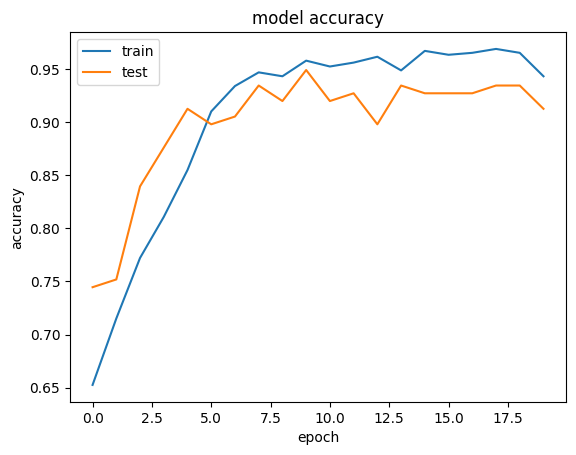

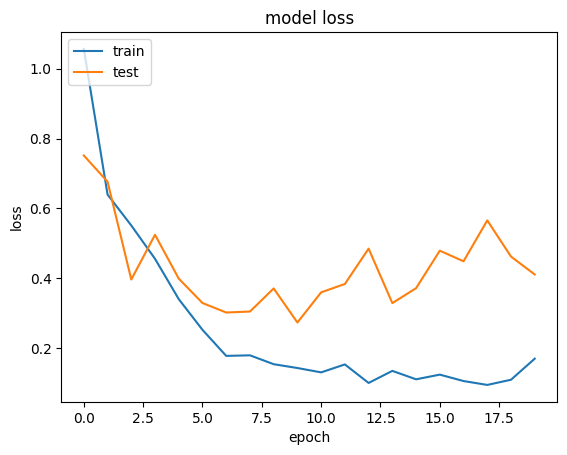

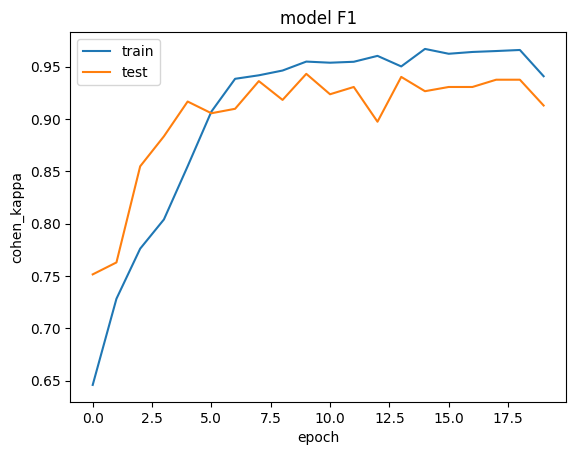

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1')
plt.ylabel('cohen_kappa')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
# Exemple de nouvelle réponse à tester
nouvelle_reponse = "عبادة قوم عاد للأصنام كانت تعبيرًا عن تمردهم على الرسل ورفضهم لرسالة الله"

# Nettoyer la nouvelle réponse
nouvelle_sequence = tokenizer.texts_to_sequences([nouvelle_reponse])
nouveau_padded_sequence = pad_sequences(nouvelle_sequence, maxlen=padded_sequences.shape[1])

# Faire des prédictions avec le modèle
predictions = model.predict(nouveau_padded_sequence)

# Interpréter les résultats
classe_predite =  int(np.argmax(predictions))
probabilite_predite = predictions[0][classe_predite]

# Afficher la classe prédite et la probabilité associée
print(f"Classe prédite : {classe_predite}, Probabilité : {probabilite_predite}")

NameError: name 'tokenizer' is not defined